## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from feature_engine.datetime import DatetimeFeatures

## Settings

In [2]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output='pandas')

## Loading Data

In [3]:
train_df = pd.read_csv(r'data\train.csv')
val_df = pd.read_csv(r'data\validation.csv')
test_df = pd.read_csv(r'data\test.csv')

In [4]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-05-27,Delhi,Cochin,DEL → JAI → BOM → COK,2025-04-26 05:30:00,2025-05-28 04:25:00,1375,2.0,No info,15129
1,Multiple carriers,2019-05-24,Delhi,Cochin,DEL → BOM → COK,2025-04-26 13:00:00,2025-04-26 21:00:00,480,1.0,No info,14067
2,IndiGo,2019-03-27,Delhi,Cochin,DEL → BOM → COK,2025-04-26 07:30:00,2025-04-26 13:20:00,350,1.0,No info,8227
3,Jet Airways,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,2025-04-26 14:05:00,2025-04-26 23:35:00,570,1.0,In-flight meal not included,10844
4,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,2025-04-26 11:40:00,2025-04-26 19:00:00,440,2.0,In-flight meal not included,19644
...,...,...,...,...,...,...,...,...,...,...,...
7319,IndiGo,2019-03-06,Banglore,Delhi,BLR → DEL,2025-04-26 08:30:00,2025-04-26 11:20:00,170,0.0,No info,4823
7320,Jet Airways,2019-03-21,Banglore,New Delhi,BLR → BOM → DEL,2025-04-26 07:00:00,2025-04-26 21:20:00,860,1.0,In-flight meal not included,7832
7321,IndiGo,2019-03-04,Delhi,Cochin,DEL → BOM → COK,2025-04-26 10:35:00,2025-04-26 15:35:00,300,1.0,No info,5073
7322,IndiGo,2019-04-27,Delhi,Cochin,DEL → COK,2025-04-26 05:35:00,2025-04-26 08:50:00,195,0.0,No info,6015


## Splitting 

In [5]:
def split_data(data):
    x = data.drop(columns='Price')
    y = data.Price.copy()

    return x, y

In [6]:
x_train, y_train = split_data(train_df)

In [7]:
x_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-05-27,Delhi,Cochin,DEL → JAI → BOM → COK,2025-04-26 05:30:00,2025-05-28 04:25:00,1375,2.0,No info
1,Multiple carriers,2019-05-24,Delhi,Cochin,DEL → BOM → COK,2025-04-26 13:00:00,2025-04-26 21:00:00,480,1.0,No info
2,IndiGo,2019-03-27,Delhi,Cochin,DEL → BOM → COK,2025-04-26 07:30:00,2025-04-26 13:20:00,350,1.0,No info
3,Jet Airways,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,2025-04-26 14:05:00,2025-04-26 23:35:00,570,1.0,In-flight meal not included
4,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,2025-04-26 11:40:00,2025-04-26 19:00:00,440,2.0,In-flight meal not included
...,...,...,...,...,...,...,...,...,...,...
7319,IndiGo,2019-03-06,Banglore,Delhi,BLR → DEL,2025-04-26 08:30:00,2025-04-26 11:20:00,170,0.0,No info
7320,Jet Airways,2019-03-21,Banglore,New Delhi,BLR → BOM → DEL,2025-04-26 07:00:00,2025-04-26 21:20:00,860,1.0,In-flight meal not included
7321,IndiGo,2019-03-04,Delhi,Cochin,DEL → BOM → COK,2025-04-26 10:35:00,2025-04-26 15:35:00,300,1.0,No info
7322,IndiGo,2019-04-27,Delhi,Cochin,DEL → COK,2025-04-26 05:35:00,2025-04-26 08:50:00,195,0.0,No info


In [8]:
y_train

0       15129
1       14067
2        8227
3       10844
4       19644
        ...  
7319     4823
7320     7832
7321     5073
7322     6015
7323     3543
Name: Price, Length: 7324, dtype: int64

In [9]:
x_val, y_val = split_data(val_df)
print(x_val.shape, y_val.shape)

(1569, 10) (1569,)


In [10]:
x_test, y_test = split_data(test_df)
print(x_test.shape, y_test.shape)

(1570, 10) (1570,)


## Info

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          7324 non-null   object 
 1   Date_of_Journey  7324 non-null   object 
 2   Source           7324 non-null   object 
 3   Destination      7324 non-null   object 
 4   Route            7323 non-null   object 
 5   Dep_Time         7324 non-null   object 
 6   Arrival_Time     7324 non-null   object 
 7   Duration         7324 non-null   int64  
 8   Total_Stops      7323 non-null   float64
 9   Additional_Info  7324 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 572.3+ KB


## Data Processing

In [12]:
datetime_columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
numeric_columns = ['Duration', 'Total_Stops']
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [13]:
doj_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("extractor", DatetimeFeatures(features_to_extract=['week', 'day_of_week', 'month', 'day_of_month'], format='mixed')),
    ("scaler", StandardScaler())
])
time_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("extractor", DatetimeFeatures(features_to_extract=['hour', 'minute'], format='mixed')),
    ("scaler", StandardScaler())
])
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [14]:
preprocessors = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numeric_columns),
    ('categorical', categorical_transformer, categorical_columns),
    ('doj', doj_transformer, ['Date_of_Journey']),
    ('time', time_transformer, ['Dep_Time', 'Arrival_Time'])
])

In [15]:
preprocessors.fit_transform(x_train)

,numerical__Duration,numerical__Total_Stops,categorical__Airline_Air Asia,categorical__Airline_Air India,categorical__Airline_GoAir,categorical__Airline_IndiGo,categorical__Airline_Jet Airways,categorical__Airline_Jet Airways Business,categorical__Airline_Multiple carriers,categorical__Airline_Multiple carriers Premium economy,categorical__Airline_SpiceJet,categorical__Airline_Vistara,categorical__Airline_Vistara Premium economy,categorical__Source_Banglore,categorical__Source_Chennai,categorical__Source_Delhi,categorical__Source_Kolkata,categorical__Source_Mumbai,categorical__Destination_Banglore,categorical__Destination_Cochin,categorical__Destination_Delhi,categorical__Destination_Hyderabad,categorical__Destination_Kolkata,categorical__Destination_New Delhi,categorical__Route_BLR → AMD → DEL,categorical__Route_BLR → BBI → DEL,categorical__Route_BLR → BDQ → DEL,categorical__Route_BLR → BOM → AMD → DEL,categorical__Route_BLR → BOM → BHO → DEL,categorical__Route_BLR → BOM → DEL,categorical__Route_BLR → BOM → IDR → DEL,categorical__Route_BLR → BOM → IDR → GWL → DEL,categorical__Route_BLR → BOM → IXC → DEL,categorical__Route_BLR → BOM → JDH → DEL,categorical__Route_BLR → BOM → NAG → DEL,categorical__Route_BLR → CCU → BBI → DEL,categorical__Route_BLR → CCU → BBI → HYD → DEL,categorical__Route_BLR → CCU → DEL,categorical__Route_BLR → CCU → GAU → DEL,categorical__Route_BLR → COK → DEL,categorical__Route_BLR → DEL,categorical__Route_BLR → GAU → DEL,categorical__Route_BLR → GOI → DEL,categorical__Route_BLR → HBX → BOM → AMD → DEL,categorical__Route_BLR → HBX → BOM → NAG → DEL,categorical__Route_BLR → HYD → DEL,categorical__Route_BLR → HYD → VGA → DEL,categorical__Route_BLR → IDR → DEL,categorical__Route_BLR → LKO → DEL,categorical__Route_BLR → MAA → DEL,categorical__Route_BLR → NAG → DEL,categorical__Route_BLR → PNQ → DEL,categorical__Route_BLR → STV → DEL,categorical__Route_BLR → TRV → COK → DEL,categorical__Route_BLR → VGA → DEL,categorical__Route_BLR → VGA → HYD → DEL,categorical__Route_BLR → VGA → VTZ → DEL,categorical__Route_BOM → AMD → ISK → HYD,categorical__Route_BOM → BDQ → DEL → HYD,categorical__Route_BOM → BHO → DEL → HYD,categorical__Route_BOM → BLR → CCU → BBI → HYD,categorical__Route_BOM → BLR → HYD,categorical__Route_BOM → CCU → HYD,categorical__Route_BOM → COK → MAA → HYD,categorical__Route_BOM → DED → DEL → HYD,categorical__Route_BOM → DEL → HYD,categorical__Route_BOM → GOI → HYD,categorical__Route_BOM → GOI → PNQ → HYD,categorical__Route_BOM → HYD,categorical__Route_BOM → IDR → DEL → HYD,categorical__Route_BOM → JAI → DEL → HYD,categorical__Route_BOM → JDH → DEL → HYD,categorical__Route_BOM → JLR → HYD,categorical__Route_BOM → MAA → HYD,categorical__Route_BOM → RPR → VTZ → HYD,categorical__Route_BOM → UDR → DEL → HYD,categorical__Route_CCU → AMD → BLR,categorical__Route_CCU → BBI → BLR,categorical__Route_CCU → BBI → BOM → BLR,categorical__Route_CCU → BBI → HYD → BLR,categorical__Route_CCU → BBI → IXR → DEL → BLR,categorical__Route_CCU → BLR,categorical__Route_CCU → BOM → AMD → BLR,categorical__Route_CCU → BOM → BLR,categorical__Route_CCU → BOM → COK → BLR,categorical__Route_CCU → BOM → GOI → BLR,categorical__Route_CCU → BOM → HBX → BLR,categorical__Route_CCU → BOM → PNQ → BLR,categorical__Route_CCU → BOM → TRV → BLR,categorical__Route_CCU → DEL → AMD → BLR,categorical__Route_CCU → DEL → BLR,categorical__Route_CCU → DEL → COK → BLR,categorical__Route_CCU → DEL → COK → TRV → BLR,categorical__Route_CCU → DEL → VGA → BLR,categorical__Route_CCU → GAU → BLR,categorical__Route_CCU → GAU → DEL → BLR,categorical__Route_CCU → GAU → IMF → DEL → BLR,categorical__Route_CCU → HYD → BLR,categorical__Route_CCU → IXB → BLR,categorical__Route_CCU → IXB → DEL → BLR,categorical__Route_CCU → IXR → BBI → BLR,categorical__Route_CCU → IXR → DEL → BLR,categorical__Route_CCU → IXZ → MAA → BLR,categorical__Route_CCU → JAI → BOM → BLR,categorical__Route_CCU → JAI → DEL → BLR,categorical__Route_CCU → KNU → BLR,categorical__Route_CCU → MAA → BLR,

## Model Selection

In [16]:
algorithms = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=10),
    "XG Boost": XGBRegressor(n_estimators=10)
}

In [17]:
data = pd.concat([train_df, val_df], axis=0)

x_data, y_data = split_data(data)


In [18]:
def plot_curves(sizes, mean_scores, std_scores, label, axis):
    axis.plot(sizes, mean_scores, marker='o', label=label)
    axis.fill_between(x=sizes, y1=mean_scores-std_scores, y2=mean_scores+std_scores, alpha=0.5)

In [19]:
def plot_learning_curves(algo_name, algorithm, figsize=(12, 4)):
    model = Pipeline(steps=[
        ("preprocessor", preprocessors),
        ("algorithm", algorithm)
    ])

    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=x_data, y=y_data, cv=3, scoring='r2', n_jobs=-1, random_state=42)

    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    figure, axis = plt.subplots(figsize=figsize)

    # training curve
    plot_curves(train_sizes, mean_train_scores, std_train_scores, f"Train ({train_score})", axis)
    
    # test curve
    plot_curves(train_sizes, mean_test_scores, std_test_scores, f"Test ({test_score})", axis)

    axis.set(xlabel="Training Set Sizes", ylabel="R-squared", title=algo_name)
    axis.legend(loc="lower right")

    plt.show()

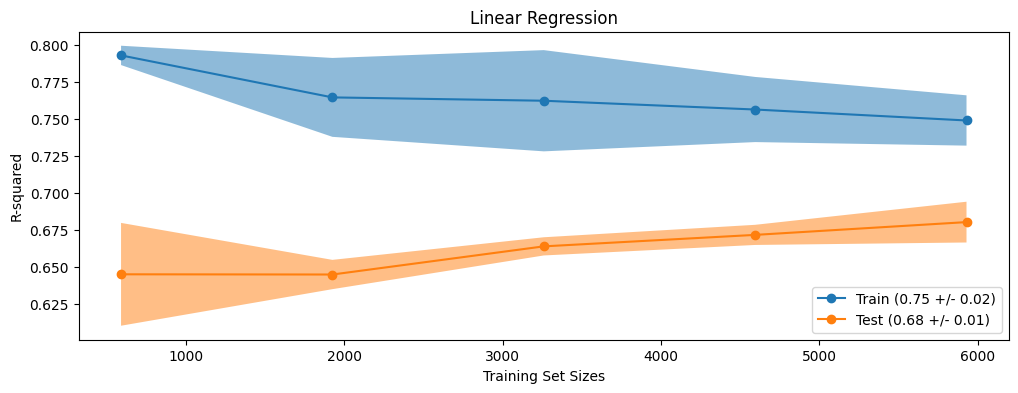

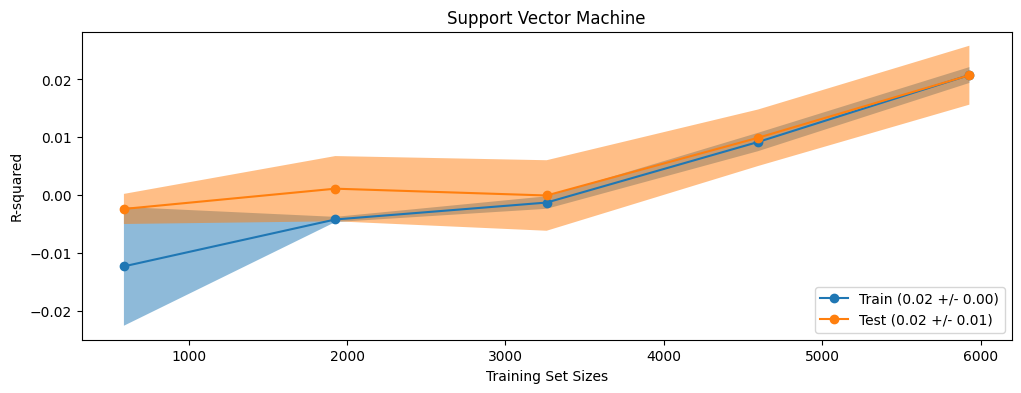

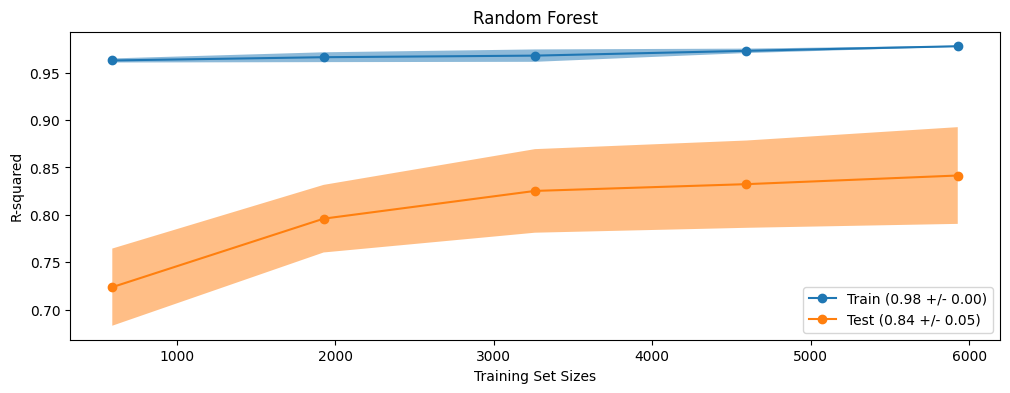

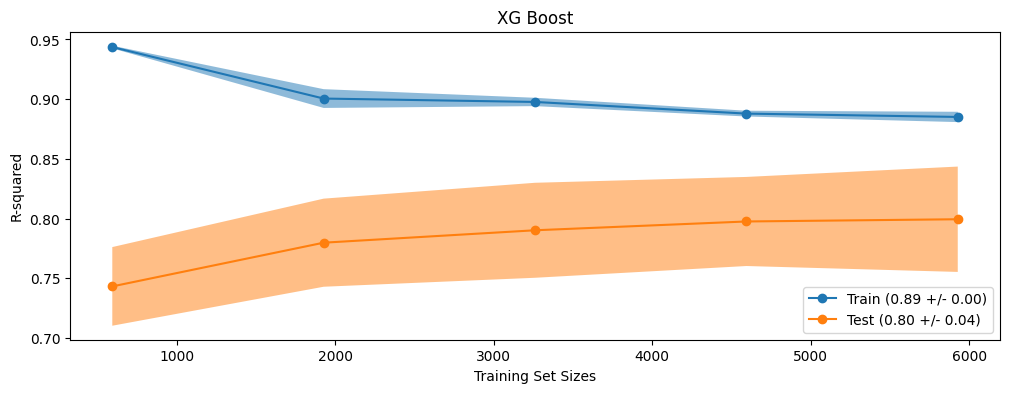

In [20]:
for algo_name, algorithm in algorithms.items():
    plot_learning_curves(algo_name, algorithm)

## Model Training

In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessors),
    ('algorithm', RandomForestRegressor(n_estimators=10))
])

In [22]:
model.fit(x_data, y_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Airline', 'Sou...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('algorithm', RandomForestRegressor(n_estimators=10))])

## Model Evaluation

In [23]:
def evaluate_model(x, y):
    y_predict = model.predict(x)
    return r2_score(y, y_predict)

In [24]:
print(f"The R2 score on training data is: {evaluate_model(x_data, y_data)}")
print(f"The R2 score on test data is: {evaluate_model(x_test, y_test)}")

The R2 score on training data is: 0.976970934853455
The R2 score on test data is: 0.9051151330692371


## Model Persistence

In [25]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [26]:
saved_model = joblib.load('model.joblib')
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Airline', 'Sou...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('algorithm', RandomForestRegressor(n_estimators=10))])

In [27]:
y_pred = saved_model.predict(x_test)
r2_score(y_test, y_pred)

0.9051151330692371